#Honours Project 1(2022)- Shooting method

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
step_size = 1e-3
tolerance_level = 1e-6

x_start = np.sqrt(np.pi / 6)
x_target = 2 * np.sqrt(np.pi / 3)
boundary_y0 = -0.5
boundary_y_target = 0


In [12]:
# Exact solution for comparison
def exact_solution_y(x):
    return 0.5 * np.sin(x**2) - (np.sqrt(3) / 2) * np.cos(x**2)

def exact_solution_dy(x):
    return x * np.cos(x**2) + np.sqrt(3) * np.sin(x**2)

# Runge-Kutta 4th order method
def runge_kutta(f, y0, x_start, step_size, x_target):
    x = np.arange(x_start, x_target + step_size, step_size)  # x array with the time step
    y = np.zeros((x.size, y0.size))  # Create y array filled with zeros
    y[0] = y0  # Store the initial value of y
    
    for i in range(x.size - 1):
        h = step_size
        k1 = f(x[i], y[i])
        k2 = f(x[i] + 0.5 * h, y[i] + 0.5 * h * k1)
        k3 = f(x[i] + 0.5 * h, y[i] + 0.5 * h * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        
        y[i + 1] = y[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6.0  # Update y
    
    return x, y

In [13]:
# Initial condition function for y' at the boundary
def initial_condition(a):
    return np.array([boundary_y0, a])  # y0 and the initial guess for y'

# System of first-order ODEs
def f(x, y):
    return np.array([y[1], (1 / x) * y[1] - 4 * x**2 * y[0]])

# Function F(a) for shooting method
def F(a, x_end):
    y0 = initial_condition(a)
    x_arr, y_arr = runge_kutta(f, y0, x_start, step_size, x_end)
    return y_arr[-1, 0] - boundary_y_target  # F(a) = y(x_end) - y_target

# Secant method for root finding
def secant_method(F, x0, x1, tol):
    while abs(x1 - x0) > tol:
        x_new = x1 - F(x1) * (x1 - x0) / (F(x1) - F(x0))
        x0 = x1
        x1 = x_new
    return x1

In [14]:
# Root finding to determine the shooting parameter a
x1_guess = 1.0  # Initial guess for secant method
x0_guess = 0.5  # Second guess for secant method
a_root = secant_method(lambda a: F(a, x_target), x0_guess, x1_guess, tolerance_level)
print('The value of a_root is:', round(a_root, 3))

# Solve the ODE using the shooting parameter
y0 = initial_condition(a_root)
x, y = runge_kutta(f, y0, x_start, step_size, x_target)


The value of a_root is: 1.242


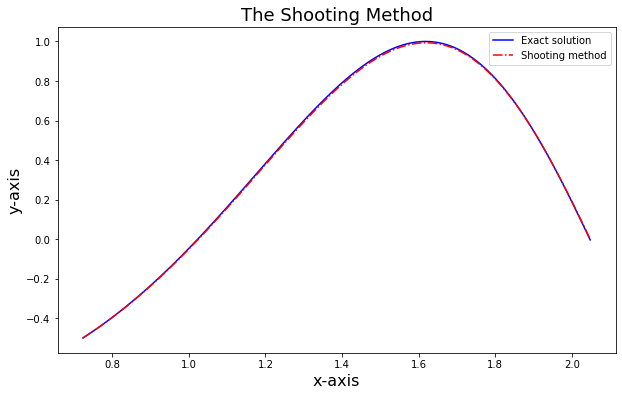

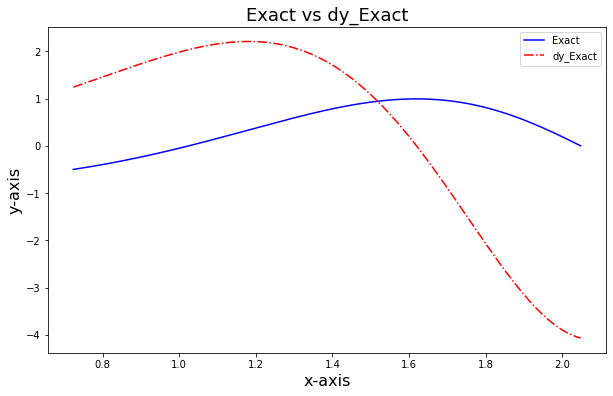

In [24]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, exact_solution_y(x), '-b', label='Exact solution')
plt.plot(x, y[:, 0], '-.r', label='Shooting method')
plt.xlabel('x-axis', fontsize=16)
plt.ylabel('y-axis', fontsize=16)
plt.title('The Shooting Method', fontsize=18)
plt.legend()
plt.savefig('project1_shooting_method.png')
plt.show()

# Plotting the exact solution and the derivative of the exact solution from the shooting method
plt.figure(figsize=(10, 6))
plt.plot(x, y[:, 0], '-b', label='Exact')
plt.plot(x, y[:, 1], '-.r', label='dy_Exact')
plt.title('Exact vs dy_Exact', fontsize=18)
plt.xlabel('x-axis', fontsize=16)
plt.ylabel('y-axis', fontsize=16)
plt.legend()
plt.savefig('project1_2.png')
plt.show()
